In [1]:
%pip install pandas

import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Visualise GDP per country for the Euro area

/var/folders/xj/wb1yspgs1dqbhqyjrk35n9w00000gr/T/ipykernel_27014/3435372940.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_data_2014 = pd.read_csv('estat_nama_10_gdp_en.csv')


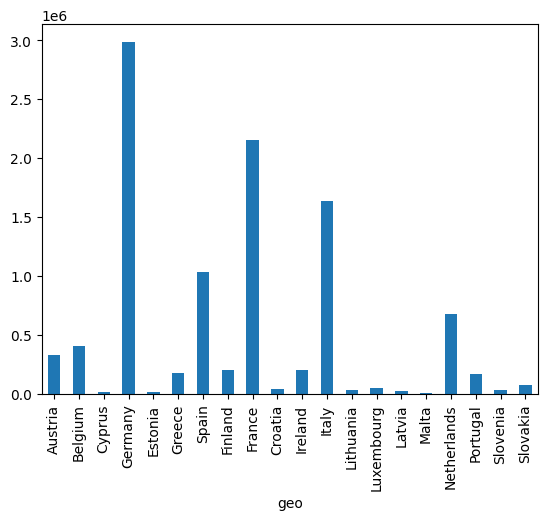

In [5]:
gdp_data_2014 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_gdp_en.csv')
gdp_data_2014 = gdp_data_2014[gdp_data_2014['unit'] == 'Current prices, million euro']
gdp_data_2014 = gdp_data_2014[gdp_data_2014['na_item'] == 'Gross domestic product at market prices']
gdp_data_2014 = gdp_data_2014[gdp_data_2014['TIME_PERIOD'] == 2014]
gdp_data_2014 = gdp_data_2014[gdp_data_2014['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_2014.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

/var/folders/xj/wb1yspgs1dqbhqyjrk35n9w00000gr/T/ipykernel_27014/956427165.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_data_2017 = pd.read_csv('estat_nama_10_gdp_en.csv')


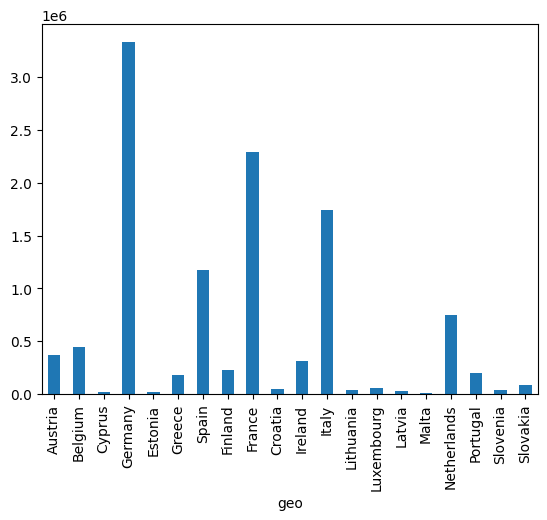

In [ ]:
gdp_data_2017 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_gdp_en.csv')
gdp_data_2017 = gdp_data_2017[gdp_data_2017['unit'] == 'Current prices, million euro']
gdp_data_2017 = gdp_data_2017[gdp_data_2017['na_item'] == 'Gross domestic product at market prices']
gdp_data_2017 = gdp_data_2017[gdp_data_2017['TIME_PERIOD'] == 2017]
gdp_data_2017 = gdp_data_2017[gdp_data_2017['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_2017.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

/var/folders/xj/wb1yspgs1dqbhqyjrk35n9w00000gr/T/ipykernel_9853/1106125186.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_data_2020 = pd.read_csv('estat_nama_10_gdp_en.csv')


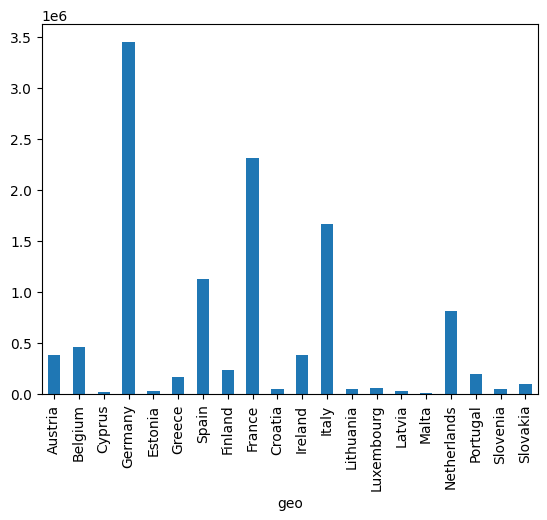

In [9]:
gdp_data_2020 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_gdp_en.csv')
gdp_data_2020 = gdp_data_2020[gdp_data_2020['unit'] == 'Current prices, million euro']
gdp_data_2020 = gdp_data_2020[gdp_data_2020['na_item'] == 'Gross domestic product at market prices']
gdp_data_2020 = gdp_data_2020[gdp_data_2020['TIME_PERIOD'] == 2020]
gdp_data_2020 = gdp_data_2020[gdp_data_2020['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_2020.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

/var/folders/xj/wb1yspgs1dqbhqyjrk35n9w00000gr/T/ipykernel_9853/2555117652.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_data_2023 = pd.read_csv('estat_nama_10_gdp_en.csv')


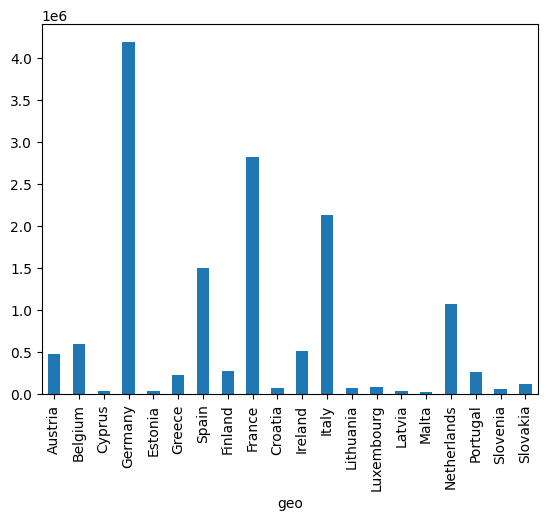

In [10]:
gdp_data_2023 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_gdp_en.csv')
gdp_data_2023 = gdp_data_2023[gdp_data_2023['unit'] == 'Current prices, million euro']
gdp_data_2023 = gdp_data_2023[gdp_data_2023['na_item'] == 'Gross domestic product at market prices']
gdp_data_2023 = gdp_data_2023[gdp_data_2023['TIME_PERIOD'] == 2023]
gdp_data_2023 = gdp_data_2023[gdp_data_2023['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_2023.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

### Visualise GDP per capita per country for the Euro area

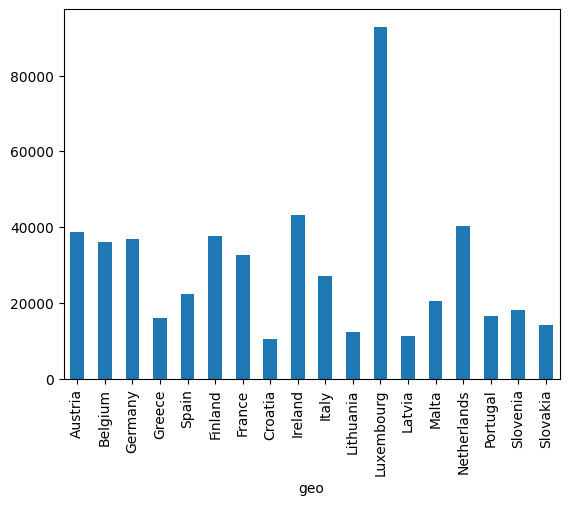

In [11]:
GdpPc14 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_pc_en.csv')
GdpPc14 = GdpPc14[GdpPc14['unit'] == 'Current prices, euro per capita']
GdpPc14 = GdpPc14[GdpPc14['na_item'] == 'Gross domestic product at market prices']
GdpPc14 = GdpPc14[GdpPc14['TIME_PERIOD'] == 2014]
GdpPc14 = GdpPc14[GdpPc14['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
GdpPc14.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

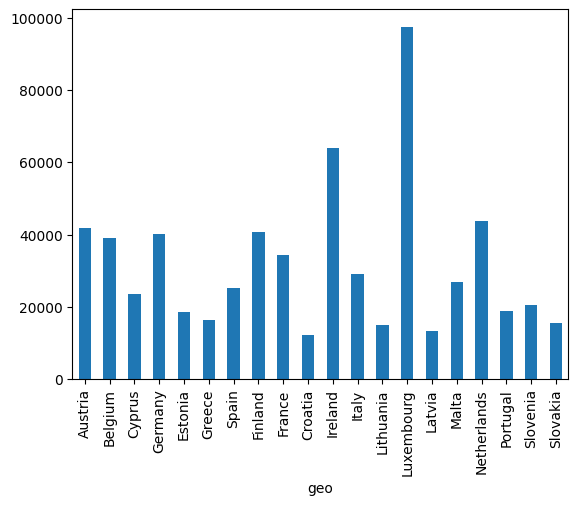

In [12]:
gdp_data_pc_2017 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_pc_en.csv')
gdp_data_pc_2017 = gdp_data_pc_2017[gdp_data_pc_2017['unit'] == 'Current prices, euro per capita']
gdp_data_pc_2017 = gdp_data_pc_2017[gdp_data_pc_2017['na_item'] == 'Gross domestic product at market prices']
gdp_data_pc_2017 = gdp_data_pc_2017[gdp_data_pc_2017['TIME_PERIOD'] == 2017]
gdp_data_pc_2017 = gdp_data_pc_2017[gdp_data_pc_2017['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_pc_2017.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

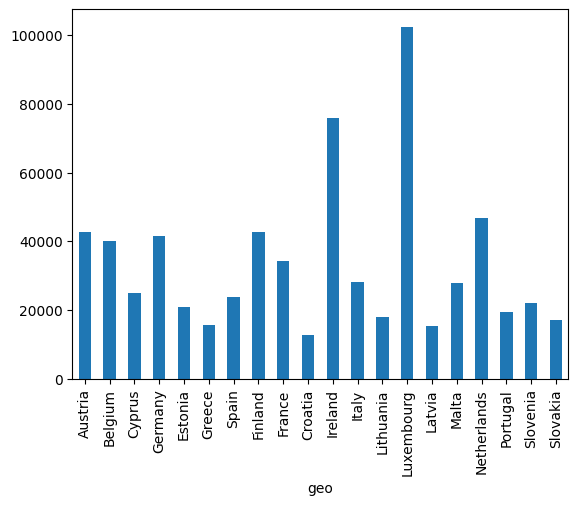

In [13]:
gdp_data_pc_2020=pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_pc_en.csv')
gdp_data_pc_2020=gdp_data_pc_2020[gdp_data_pc_2020['unit']=='Current prices, euro per capita']
gdp_data_pc_2020=gdp_data_pc_2020[gdp_data_pc_2020['na_item']=='Gross domestic product at market prices']
gdp_data_pc_2020=gdp_data_pc_2020[gdp_data_pc_2020['TIME_PERIOD']==2020]
gdp_data_pc_2020=gdp_data_pc_2020[gdp_data_pc_2020['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_pc_2020.plot(y='OBS_VALUE',x='geo',kind='bar',legend=False)
plt.show()

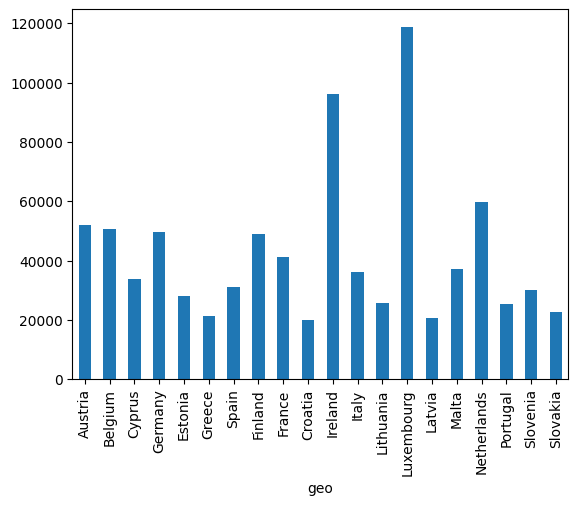

In [16]:
gdp_data_pc_2023 = pd.read_csv('Users/Documents/Analysis/projects/stuff/myurgentprojects/commissionproject/estat_nama_10_pc_en.csv')
gdp_data_pc_2023 = gdp_data_pc_2023[gdp_data_pc_2023['unit'] == 'Current prices, units of national currency per capita']
gdp_data_pc_2023 = gdp_data_pc_2023[gdp_data_pc_2023['na_item'] == 'Gross domestic product at market prices']
gdp_data_pc_2023 = gdp_data_pc_2023[gdp_data_pc_2023['TIME_PERIOD'] == 2023]
gdp_data_pc_2023 = gdp_data_pc_2023[gdp_data_pc_2023['geo'].isin(['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain'])]

import matplotlib.pyplot as plt

# Create a bar chart
gdp_data_pc_2023.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
plt.show()

In [21]:
merged_gdp_2023_df = gdp_data_2023[['geo', 'OBS_VALUE']].merge(gdp_data_pc_2023[['geo', 'OBS_VALUE']], on='geo', suffixes=('_gdp', '_gdp_pc'))
merged_gdp_2023_df.to_csv('merged_gdp_2023_data.csv', index = False)